In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

# All score DataFrame
results = pd.DataFrame([],columns=['Accuracy Score','Train Accuracy', "Precision Score", "Recall Score", "F1 Score"])

In [2]:
# load dataset
df_test = pd.read_csv("./datasets/blood_samples_test_dataset.csv")
df_test

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes
482,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes


In [3]:
df_test.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [4]:
df_test['Disease']=df_test['Disease'].replace('Heart Di','Heart Disease')
df_test['Disease'].unique()

array(['Thalasse', 'Diabetes', 'Heart Disease', 'Anemia', 'Thromboc',
       'Healthy'], dtype=object)

In [64]:
df_train = pd.read_csv("./datasets/blood_samples_train_dataset.csv")
df_train

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.223039,0.405516,0.407582,0.532910,0.363315,0.066099,0.264072,-0.000614,0.179961,...,0.930276,0.001036,0.911407,0.362708,0.271381,0.869786,0.600495,1.000125,0.999488,Thalasse
1,0.001827,0.999606,0.997876,0.493254,0.411048,0.997267,0.231148,0.096269,-0.000614,0.532144,...,0.619516,0.872995,0.382515,0.443023,0.912826,0.002145,0.999348,1.000125,0.999488,Thalasse
2,0.333810,0.999606,0.234002,0.999507,0.512061,0.000552,0.136219,0.444761,0.973312,0.325472,...,0.698824,0.182758,0.015562,1.000326,0.192591,0.999857,0.489288,1.000125,0.508807,Diabetes
3,0.220122,0.312241,0.997876,0.999507,-0.000206,0.000552,0.004556,0.922165,0.999234,0.437576,...,-0.000991,0.480800,-0.000546,0.992587,0.883711,0.992536,0.475055,1.000125,0.999488,Diabetes
4,0.710511,0.445643,0.129457,0.552296,0.746550,0.348281,0.020194,0.996362,0.999234,0.058577,...,0.363411,0.001036,0.047517,0.909088,1.000402,0.929436,0.748605,1.000125,0.674777,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.072583,0.779169,0.225946,0.999507,0.236919,0.000552,0.409359,0.996362,0.770348,0.117311,...,-0.000991,0.608412,-0.000546,0.167781,0.700718,0.061436,0.488018,1.000125,0.397379,Diabetes
4996,0.034605,0.663044,0.905602,0.999507,0.769731,0.239770,0.248180,0.851264,0.550578,0.506971,...,0.289445,0.721613,0.746199,0.995041,1.000402,0.624630,0.999348,1.000125,0.297102,Diabetes
4997,0.308776,0.820669,0.656116,0.999507,0.398924,0.236227,0.042550,0.996362,0.253930,0.117701,...,0.805471,0.104335,0.343633,0.134448,0.707919,0.823367,0.382992,0.940226,0.999488,Diabetes
4998,0.001827,0.578513,0.645858,0.002555,0.255779,0.535745,0.004556,0.006792,0.748946,0.773194,...,0.722592,0.259896,-0.000546,0.163302,0.002047,0.649700,0.821110,1.000125,0.999488,Diabetes


In [54]:
#df_train = pd.read_csv("./datasets/blood_samples_train_dataset.csv")
#df_train['Disease']=df_train['Disease'].replace('Heart Di','Heart Disease')

df_balanced = pd.read_csv("./datasets/blood_samples_balanced_dataset.csv")
df_balanced['Disease']=df_balanced['Disease'].replace('Heart Di','Heart Disease')

In [55]:
data = pd.concat([df_test, df_balanced],ignore_index=True)
data.shape # (rows, columns)

(2837, 25)

In [56]:
data.Disease.value_counts()

Disease
Diabetes         834
Anemia           707
Healthy          561
Thalasse         557
Thromboc         139
Heart Disease     39
Name: count, dtype: int64

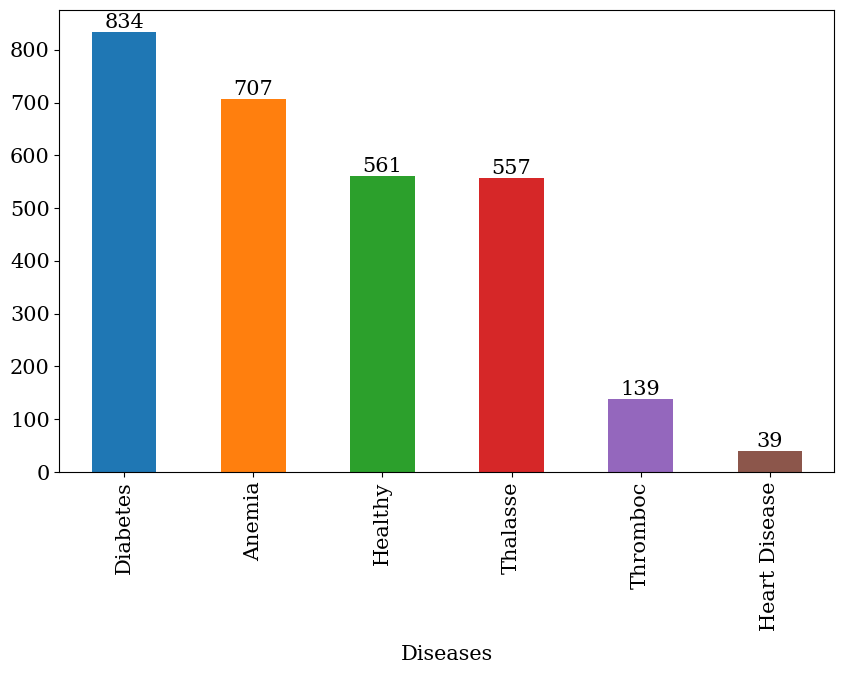

In [57]:
# Let's find how many of each class there are in the bar chart.
counts = data[data.columns[-1]].value_counts()
palette = sns.color_palette()
fig, axes = plt.subplots(figsize=(10,6))
counts.plot(kind="bar", ax=axes, color=palette)
plt.xlabel('Diseases',labelpad=10)
for container in axes.containers:
    axes.bar_label(container)
plt.show()

In [58]:
# model testing libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def predictor(model_name, xtrain, xtest, ytrain, ytest):    
    print("For the {}".format(model_name)) 
    print("")
    model_name.fit(xtrain,ytrain)    
    y_pred_train = model_name.predict(xtrain)    
    y_pred_test = model_name.predict(xtest)
    test_accuracy = accuracy_score(ytest,y_pred_test)
    train_accuracy = accuracy_score(ytrain,y_pred_train)
    precision_test_score = precision_score(ytest, y_pred_test, average='weighted', zero_division='warn')
    recall_test_score = recall_score(ytest, y_pred_test, average='weighted')
    f1_test_score = f1_score(ytest, y_pred_test, average='weighted')
    print("The TRAIN accuracy is",train_accuracy)    
    print("--"*50)    
    print("The TEST accuracy is",test_accuracy)
    return test_accuracy, train_accuracy, precision_test_score, recall_test_score, f1_test_score

In [59]:
from sklearn.preprocessing import StandardScaler
def standardization(xtrain, xtest):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(xtrain)
    X_test_scaled = scaler.transform(xtest)
    return X_train_scaled, X_test_scaled

In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label=LabelEncoder()
data['Disease']=label.fit_transform(data['Disease'])
disease=data['Disease']
features=data.drop('Disease',axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(features,disease,test_size=0.2, shuffle=True, random_state=42, stratify=disease)

In [61]:
from sklearn.linear_model import LogisticRegression
# standardization
X_train_scaled, X_test_scaled = standardization(xtrain, xtest)
# Create model
logmodel = LogisticRegression(max_iter= 1000, random_state = 20, multi_class = 'multinomial')
test_accuracy, train_accuracy, precision_test_score, recall_test_score, f1_test_score = predictor(logmodel, X_train_scaled, X_test_scaled, ytrain, ytest)
results.loc['LogisticRegression Model'] = [test_accuracy, train_accuracy, precision_test_score, recall_test_score, f1_test_score]

For the LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=20)

The TRAIN accuracy is 0.8880564125165271
----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.8838028169014085


In [62]:
results

,Accuracy Score,Train Accuracy,Precision Score,Recall Score,F1 Score
LogisticRegression Model,0.883803,0.888056,0.878266,0.883803,0.879793
